In [ ]:
# Title: Caddy Estimated Lagrangian Trajectory 
# Date: May 2025
# Author: Isma-eel Jattiem

In [1]:
# Load Packages
from datetime import timedelta, datetime
from operator import attrgetter

import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import xarray as xr
import trajan as ta # to plot map

from parcels import (
    AdvectionRK4,
    Field,
    FieldSet,
    ParticleSet,
    Variable,
    ScipyParticle,
    JITParticle,
)

In [17]:
# Velocity fields
filenames = {'U': "Caddy_current_data_2.nc",
             'V': "Caddy_current_data_2.nc"}

variables = {'U': "uo",
             'V': "vo",}

dimensions = {'U': {"lat": "latitude", "lon": "longitude", "time": "time"},
              'V': {"lat": "latitude", "lon": "longitude", "time": "time"},}


In [18]:
# Setting Fieldset
fieldset = FieldSet.from_netcdf(
    filenames,
    variables,
    dimensions,interp_method={
        "U": "freeslip",
        "V": "freeslip",  
    },
    allow_time_extrapolation = True,  # Setting the interpolation for U and V
)

In [19]:
# Defining function DeleteParticle for particles which go out of bounds
def DeleteParticle(particle, fieldset, time):
    if particle.state == StatusCode.ErrorOutOfBounds:
        particle.delete()

In [20]:
# Creating ParticleSet
pset = ParticleSet(
    fieldset=fieldset, 
    pclass=JITParticle, 
    lat = [-33.98253],  # a vector of release latitude
    lon = [25.66508],  # a vector of release longitude
    time = (datetime(2022, 7, 7, 4, 0, 0)),) # Released on the 7 July 2022 @ 04:00

# Creating Kernel of desired Functions 
kernels = [AdvectionRK4, DeleteParticle]

In [21]:
output_file = pset.ParticleFile(name="Caddy_parcel_traj_2.zarr", outputdt=timedelta(hours=24))

In [22]:
# Executing Code
pset.execute(kernels, 
             runtime = timedelta(days = 14),  # Till the 28th
             dt = timedelta(hours = 24),  # 1 timestep for each day
             output_file=output_file)

INFO: Output files are stored in Caddy_parcel_traj_2.zarr.
100%|██████████| 1209600.0/1209600.0 [00:02<00:00, 484334.97it/s]


C:\Users\ijatt\anaconda3\envs\parcels\Lib\site-packages\trajan\plot\__init__.py:159: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  num = self.ds.dims['trajectory']


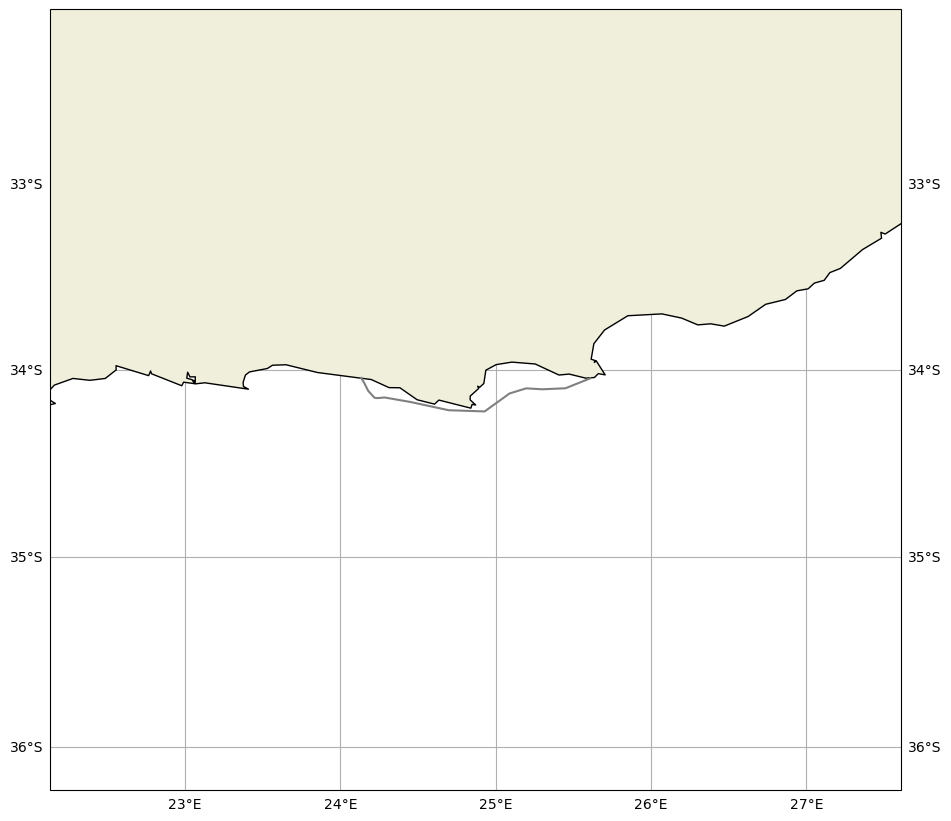

In [23]:
# Plotting trajectory on map
ds = xr.open_zarr("Caddy_parcel_traj_2.zarr")
# num = self.ds.dims['trajectory']
ds.traj.plot(margin = 2)
plt.show()

In [75]:
# Saving file as a netCDF

import xarray as xr

def zarr_to_netcdf(zarr_filepath, netcdf_filepath):
    """
    Converts a .zarr dataset to a NetCDF file.

    Args:
        zarr_filepath (str): Path to the input .zarr file (directory).
        netcdf_filepath (str): Path for the output NetCDF file.
    """
    try:
        # Open the Zarr dataset
        ds = xr.open_zarr(zarr_filepath)

        # Save to NetCDF
        ds.to_netcdf(netcdf_filepath)
        print(f"Successfully converted '{zarr_filepath}' to '{netcdf_filepath}'")
    except Exception as e:
        print(f"Error converting Zarr to NetCDF: {e}")

# Example usage:
# Assuming your .zarr file is located at 'my_output.zarr'
# and you want to save it as 'my_output.nc'
zarr_to_netcdf('Caddy_parcel_traj_2.zarr', 'Caddy_parcel_traj_2.nc')

Successfully converted 'Caddy_parcel_traj.zarr' to 'Caddy_parcel_traj.nc'


In [76]:
# Saving File as a csv.

import xarray as xr
import pandas as pd

def zarr_to_csv(zarr_filepath, csv_filepath):
    """
    Converts a .zarr dataset to a CSV file.
    This function flattens the data. You might need to adjust
    how your specific data is flattened based on its structure.

    Args:
        zarr_filepath (str): Path to the input .zarr file (directory).
        csv_filepath (str): Path for the output CSV file.
    """
    try:
        # Open the Zarr dataset
        ds = xr.open_zarr(zarr_filepath)

        # Convert to a Pandas DataFrame
        # .to_dataframe() will attempt to flatten the dataset.
        # For Parcels output, this often works well as each particle's
        # trajectory can become a row or set of rows.
        df = ds.to_dataframe()

        # Save to CSV
        df.to_csv(csv_filepath)
        print(f"Successfully converted '{zarr_filepath}' to '{csv_filepath}'")
    except Exception as e:
        print(f"Error converting Zarr to CSV: {e}")

# Example usage:
# Assuming your .zarr file is located at 'my_output.zarr'
# and you want to save it as 'my_output.csv'
zarr_to_csv('Caddy_parcel_traj_2.zarr', 'Caddy_parccel_traj_2.csv')

Successfully converted 'Caddy_parcel_traj.zarr' to 'Caddy_parccel_traj.csv'
